#### Laplace Transforms Monograph
This notebook reproduces the time domain solutions for the Laplace domain transfer functions described [here](https://www.controlglobal.com/assets/wp_downloads/pdf/CONTROL-Global-2018-05-09-Laplace-Transforms-Monograph.pdf). 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [28]:
# Helper (For stiff systems that don't play nicely with odeint)

def Euler(t0=0, x0=np.array([1]), t1=5, dt=0.01, model=None):
    tsp = np.arange(t0, t1, dt)
    nsize = np.size(tsp)
    X = np.empty((nsize, np.size(x0)))
    X[0] = x0
    for i in range(0, nsize - 1):
        k1 = model(X[i], tsp[i])
        X[i+1] = X[i] + k1 * dt
    return X, tsp


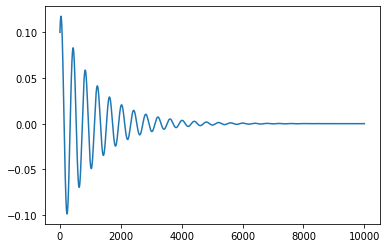

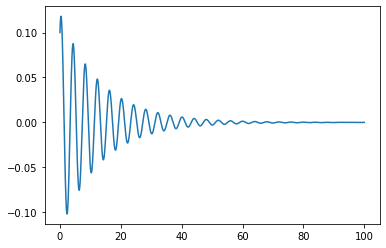

In [62]:
# Damped SHM Test

# r = 0.035
# s = 0.5
# m = 0.2
inits = np.array([0.1, 0.1])
t = np.arange(0, 100, 0.01)

def DampedSHM(x, t, r=0.035, s=0.5, m=0.2):
    return np.array([x[1],
                 (-r*x[1] - s*x[0])/m])

u = odeint(DampedSHM, inits, t)
v, tsp = Euler(t0=0, x0=inits, t1=100, dt=0.01, model=DampedSHM)

plt.figure()
plt.plot(u[:,0])
plt.figure()
plt.plot(tsp, v[:,0])

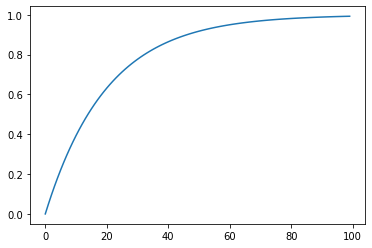

In [79]:
# Example 1.1 - Step and Hold

t = np.arange(0, 100)
u = np.empty(np.size(t))

for i in t:
    if i < 25:
        u[i] = 53.6
    elif i == 25:
        u[i] = 61
    else:
        u[i] = 68.4
    
# plt.plot(t, u)

y = np.empty(np.size(t))

for each in t:
    y[each] = 1 - np.exp(-1*each*0.05)

plt.plot(y)